In [3]:
import numpy as np
import matplotlib.pyplot as plt

Para criar um viga, é preciso instaciar um objeto da classe `Viga`. Seus parâmetros são:

$$ nomeDaViga = Viga(E,I,L,A)$$

- $L$ = Comprimento em metros
- $E$ = Módulo de elasticidade em MPa
- $I$ = Momento de inércia em metros à quarta
- $A$ = Área em m2


In [4]:
# Definir class Viga
class Viga:
    def __init__(self, L = 1, E = 20000, I = 1, A = 1):
        self.E = E
        self.I = I
        self.L = L
        self.A = A
        
        #Matriz de rigidez 
        self.k = E * I / L**3 * np.array([
                [12., 6*L, -12, 6*L],
                [6*L, 4*L**2, -6*L, 2*L**2],
                [-12, -6*L, 12, -6*L],
                [6*L, 2*L**2, -6*L, 4*L**2]
            ])
        
    def __str__(self):
        return ('Comprimento = ' + str(self.L) + " m, \n"
    + 'Inercia = ' + str(self.I) + ' m^4, \n'
    + 'Elasticidade = ' + str(self.E) + ' MPa \n')
        
# Exemplo de criacao de viga
minhaViga1 = Viga() #com valores padroes
minhaViga2 = Viga(2) #com comprimento 2 e resto padrao
minhaViga3 = Viga(2, 25000, 3000000) # Total

Observe que a qualquer momento pode-se obter as informações de cada viga com: `minhaViga.parametro`

In [5]:
#Exemplo
minhaViga2.L #para mostrar o comprimento da `minhaViga2`

2

In [6]:
#Exemplo to STRING
str(minhaViga1)

'Comprimento = 1 m, \nInercia = 1 m^4, \nElasticidade = 20000 MPa \n'

As matrizes de rigidez também estão disponíveis através do comando `minhaViga.k`

In [7]:
#Exemplo
minhaViga3.k #mostrar matriz de rigidez da minhaViga3

array([[  1.12500000e+11,   1.12500000e+11,  -1.12500000e+11,
          1.12500000e+11],
       [  1.12500000e+11,   1.50000000e+11,  -1.12500000e+11,
          7.50000000e+10],
       [ -1.12500000e+11,  -1.12500000e+11,   1.12500000e+11,
         -1.12500000e+11],
       [  1.12500000e+11,   7.50000000e+10,  -1.12500000e+11,
          1.50000000e+11]])

## Apoios

- Tipo 1 = fixo em x (apoiado)
- Tipo 2 = fixo em x e y (fixo)
- Tipo 3 = fixo em x, y e z (engastado)


In [8]:
#Definicao da classe Nó
#Tipo 1 = fixo em x (apoiado)
#Tipo 2 = fixo em x e y (fixo)
#Tipo 3 = fixo em x, y e z (engastado)
class Apoio:
    def __init__(self, x, tipo = 1):
        self.x = x
        self.tipo = tipo

    

In [9]:
a = Apoio(0,1)
b = Apoio(3,1)

## Forças concentradas

- Tipo 1 = em x (POSITIVO = ESQUERDA PARA DIREITA)
- Tipo 2 = em y (POSITIVO = CIMA PARA BAIXO) 
- Tipo 3 = em z (momento) (POSITIVO = HORARIO)

In [10]:
class ForcaC:
    def __init__(self, f, x, tipo):
        self.f = f
        self.x = x
        self.tipo = tipo

In [11]:
f1 = ForcaC(10,3,2)

## Forças distribuidas

No momento apenas distribuicoes lineares 
- Tipo 1 = em x (POSITIVO = ESQUERDA PARA DIREITA)
- Tipo 2 = em y (POSITIVO = CIMA PARA BAIXO) 
- Tipo 3 = em z (momento) (POSITIVO = HORARIO) [existe?]

In [12]:
class ForcaD:
    def __init__(self, f_i, f_f, x_i, x_f, tipo):
        self.f_i = f_i
        self.f_f = f_f
        self.x_i = x_i
        self.x_f = x_f
        sef.tipo = tipo

# Estrutura

Agora que temos a viga, os apoios e forças podemos fechar a estrutura e calcular os diagramas

In [13]:
class Eztrut:
    def __init__(self, vigas, apoios, cargas):
        self.vigas = vigas
        self.apoios = apoios
        self.cargas = cargas
        
    def mostrar_vigas(self):
        for viga in self_vigas:
            print(str(viga))
        
    
    def estaticidade(self):
        estaticidade = 0
        for apoio in self.apoios:
            estacidade+= apoio.tipo

## Plotagem

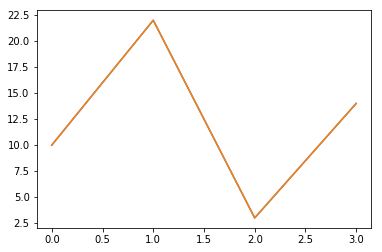

In [20]:
# plotagem simples
# plt.plot([valores x], [valores y])
plt.plot([0,1,2,3],[10,22,3,14])
plt.show()

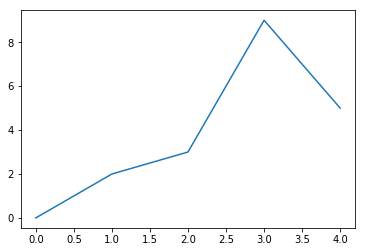

In [24]:
# Somente valores de y
y = [0,2,3,9,5]
plt.plot(y)
plt.show()

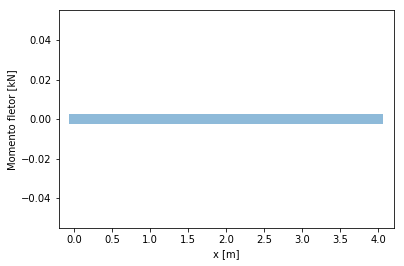

In [33]:
# Uma viga de tamanho 4 com legenda de eixo
plt.plot([0,4], [0,0], linewidth = 10, alpha = 0.5)
plt.xlabel("x [m]")
plt.ylabel("Momento fletor [kN]")
plt.show()

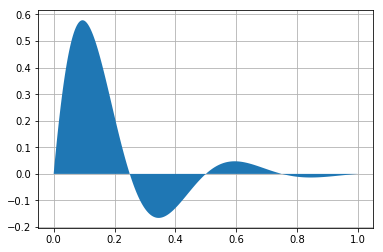

In [38]:

x = np.linspace(0, 1, 500)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)

fig, ax = plt.subplots()

ax.fill(x, y, zorder=10)
ax.grid(True, zorder=5)
plt.show()

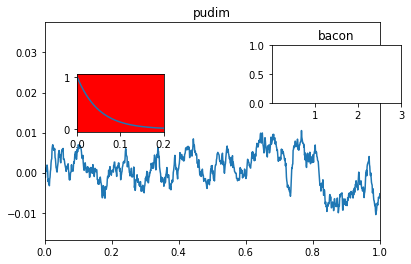

In [61]:
# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000]/0.05)               # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)]*dt  # colored noise

plt.plot(t,s)
plt.title('pudim')
plt.axis([0, 1, 1.1*np.amin(s), 2*np.amax(s)])

# sub plot
plt.axes([0.65, 0.6, 0.3,0.2]) #inicio, tamamnho
plt.title('bacon')
plt.xticks([1,2,3])

# outro sub plot
plt.axes([0.2,0.5, 0.2, 0.2], facecolor='r')
plt.plot(t[:len(r)],r)
plt.xlim(0,0.2)
plt.show()

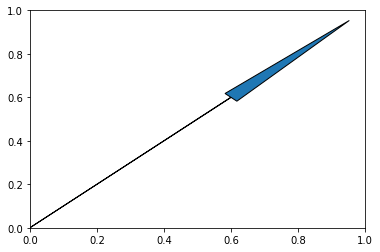

In [71]:
# desenhar flecha
ax = plt.axes()
ax.arrow(0,0, 0.6,0.6, head_width=0.05, head_length=0.5)
plt.show()


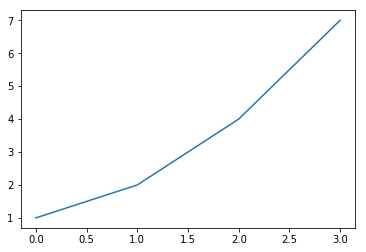

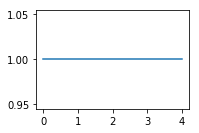

array([ 0.,  0.,  0.,  0.,  0.])

In [76]:
plt.plot([1,2,4,7])
points = np.ones(5)
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(points)
plt.show()
np.zeros(5)b

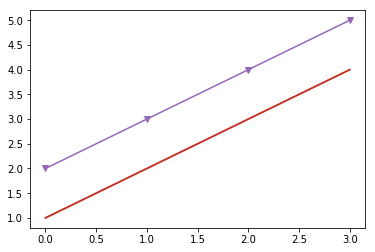

In [83]:
plt.plot([1,2,3,4])
plt.plot([2,3,4,5], marker= 'v')
plt.show()

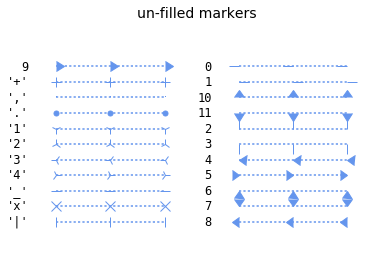

In [67]:
"""
Filled and unfilled-marker types
================================

Reference for filled- and unfilled-marker types included with Matplotlib.
"""
from six import iteritems
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


points = np.ones(3)  # Draw 3 points for each line
text_style = dict(horizontalalignment='right', verticalalignment='center',
                  fontsize=12, fontdict={'family': 'monospace'})
marker_style = dict(linestyle=':', color='cornflowerblue', markersize=10)


def format_axes(ax):
    ax.margins(0.2)
    ax.set_axis_off()


def nice_repr(text):
    return repr(text).lstrip('u')


def split_list(a_list):
    i_half = len(a_list) // 2
    return (a_list[:i_half], a_list[i_half:])


# Plot all un-filled markers
# --------------------------

fig, axes = plt.subplots(ncols=2)

# Filter out filled markers and marker settings that do nothing.
# We use iteritems from six to make sure that we get an iterator
# in both python 2 and 3
unfilled_markers = [m for m, func in iteritems(Line2D.markers)
                    if func != 'nothing' and m not in Line2D.filled_markers]
# Reverse-sort for pretty. We use our own sort key which is essentially
# a python3 compatible reimplementation of python2 sort.
unfilled_markers = sorted(unfilled_markers,
                          key=lambda x: (str(type(x)), str(x)))[::-1]
for ax, markers in zip(axes, split_list(unfilled_markers)):
    for y, marker in enumerate(markers):
        ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y * points, marker=marker, **marker_style)
        format_axes(ax)

plt.show()

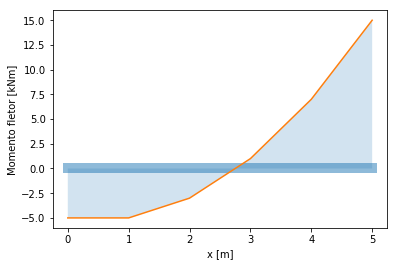

In [34]:
j= range(0,6)
x = []
y = []
for i in j:
    x.append(i)
    y.append(-5 + i**2 - i)

#Preparar graficos para sombrear regiao
xgraf = [0] + x #colocar um zero na primera casa
xgraf.append(5) #colocar o ultimo valor no final do vetor
ygraf = [0] + y
ygraf.append(0)

plt.plot([0,5], [0, 0], linewidth = 10, alpha=0.5)
plt.xlabel('x [m]')
plt.ylabel('Momento fletor [kNm]')
plt.plot(y)
plt.fill(xgraf, ygraf, 'v', alpha=0.2)
plt.show()

In [ ]:
ygraf

In [ ]:
Eztrut.estaticidade(ex1)

In [ ]:
import PIL.image
from cStringIO import StringIO
import IPython.display
def showarray(a, fmt='png'):
    a = np.uint8(a)
    f = StringIO()
    PIL.Image.fromarray(a).save(f, fmt)
    IPython.display.display(IPython.display.Image(data=f.getvalue()))